In [3]:
import os
from rendering import render_object

os.chdir("/home/sebastian/Projects/SRB/Package/scanner-sim")



# # Calibration
# for i in range(6, 20):
#     pars = generate_render_parameters("objects/calibration/cb10_8_3_ms_c.ply", "results/calib_predistorted/%02i"%i, cpu_count=8, typ="calib")
#     config_name = "data/configs/parameters_calibration.json"

#     with open(config_name, "w") as fi:
#         json.dump(pars, fi, indent=2, sort_keys=True)   
#     render_object(config_name)

# Matching objects
# Pawn
# pars = generate_render_parameters("objects/machined/pawn.obj", "results/pawn_match/", typ="pawn", samples=256)
# config_name = "data/configs/parameters_pawn_match.json"

# with open(config_name, "w") as fi:
#     json.dump(pars, fi, indent=2, sort_keys=True)   
# render_object(config_name)

# Rook
# pars = generate_render_parameters("objects/machined/rook.obj", "results/matching/rook_match_sim2/", typ="rook", samples=128, cpu_count=8)
# config_name = "data/configs/parameters_rook_match.json"

# pars["mat_alpha"] = 0.08150848706292027
# pars["mat_ior"] = 1.0904878252015726
# pars["mat_diff"] = 0.8612623909906507
# pars["pro_offset_x"] = 0.5014564125969877
# pars["pro_offset_y"] = -0.006074395253308992
# pars["pro_aperture"] = 0.0004335

# with open(config_name, "w") as fi:
#     json.dump(pars, fi, indent=2, sort_keys=True)   
# render_object(config_name)

# # Shapes
# pars = generate_render_parameters("objects/machined/shapes.obj", "results/shapes_match/", typ="shapes", samples=256)
# config_name = "data/configs/parameters_shapes_match.json"

# with open(config_name, "w") as fi:
#     json.dump(pars, fi, indent=2, sort_keys=True)   
# render_object(config_name)


# Colored
pars = generate_render_parameters("objects/colored/vase/vase2.obj", "results/colored/vase_sim2/", typ="vase", samples=128, cpu_count=8)#,
                                 #patterns="patterns/gray/14_38")
config_name = "data/configs/parameters_colored_vase.json"

pars["mat_alpha"] = 0.08150848706292027
pars["mat_ior"] = 1.0904878252015726
pars["mat_diff"] = 0.8612623909906507
pars["pro_offset_x"] = 0.5014564125969877
pars["pro_offset_y"] = -0.006074395253308992
pars["pro_aperture"] = 0.0004335
#pars["pro_intensity"] = 0.2
pars["const_radiance"] = 0.02

with open(config_name, "w") as fi:
    json.dump(pars, fi, indent=2, sort_keys=True)   
render_object(config_name)

In [165]:
import os
from rendering import render_object
import cv2
import matplotlib.pyplot as plt
import matplotlib

os.chdir("/home/sebastian/Projects/SRB/Package/scanner-sim")


# Parameter optimization
pars = generate_render_parameters("objects/machined/pawn.obj", "results/pixel/pawn_match/", typ="pawn", cpu_count=8,
                                  samples=32, patterns="patterns/checker")
config_name = "data/configs/parameters_pawn_match.json"

# with open(config_name, "w") as fi:
#     json.dump(pars, fi, indent=2, sort_keys=True)   
# render_object(config_name)



def load_image(path, width=pars["cam_width"], height=pars["cam_height"], shift=True):
    img = cv2.imread(path, 0).astype("float64") / 255
    if shift: # Account for optical axis shift
        img = cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_CUBIC)
        img = np.concatenate([np.zeros((2, width)), img], axis=0)
        img = np.concatenate([img, np.zeros((height+2, 2))], axis=1)
        img = img[:-2, 4:]
    return img

def normalize_image(img, typ="PD"):
    if typ == "PD": #probability density
        return img / np.sum(img)
    
def plot_image(img, typ="IH", mask=img_mask, scale=[0.0, 1.0, 50]):
    if "I" in typ:
        plt.figure(figsize = (10,10))
        plt.imshow(img, cmap="gray")
        plt.show()
    
    if "H" in typ:
        plt.figure(figsize = (10,10))
        plt.hist(img[mask==1].reshape(-1), np.linspace(scale[0], scale[1], scale[2]))
        plt.show()

img_white = load_image("data/results/pixel/pawn_normalized/checker/checker.png")

img_mask = load_image("data/results/pixel/pawn_mask.png", shift=False)
img_mask = (img_mask > 0.1)*1

img_white[img_mask==0] = 0.0

#img_render = load_image("data/results/pixel/pawn_match/img_000.png", shift=False)
cv2.imwrite("data/results/pixel/pawn_checker.png", img_white*255)

img_white = normalize_image(img_white)
#img_render = normalize_image(img_render)
# ma = max(np.max(img_white), np.max(img_render))
# plot_image(img_white, scale=[0.0, ma, 50])
# plot_image(img_render, scale=[0.0, ma, 50])
# diff = img_white-img_render
# plot_image(diff)

cnt = 0
mses = []
#pars[var] = pars_n[var]
pars_n = pars.copy()

pars_n["const_radiance"] = 0.007
pars_n["mat_alpha"] = 0.08150848706292027
pars_n["mat_ior"] = 1.0904878252015726
pars_n["mat_diff"] = 0.8612623909906507

In [209]:
print(pars_n["var"])
# const_radiance = 0.007
# mat_alpha = 0.08150848706292027
# mat_ior = 1.0904878252015726
# mat_diff = 0.8612623909906507
#pro_offset_x = 0.5014564125969877
#pro_offset_y = -0.006074395253308992
#pro_aperture = 0.0004335

0.08150848706292027


In [195]:
var = "pro_scale_y"
#"mat_alpha", "mat_ior", "mat_diff", 
imgs_ref = [img_white]

#       "pro_aperture": 0.0002835,
#       "pro_beamwidth": 21.33245815404095,
#       "pro_cutoff": 21.33245815404095,
#       "pro_focus": 0.49,
#       "pro_intensity": 0.5,
#       "pro_offset_x": 0.5+0.00045641259698767686,
#       "pro_offset_y": -0.007074395253308992,
#       "pro_scale_x": 0.5,
#       "pro_scale_y": 0.5,
#       "pro_tx": 0.0,
#       "pro_ty": 0.0,
#       "pro_tz": 0.0,
#       "pro_ux": 0.0,
#       "pro_uy": 0.0,
#       "pro_uz": 0.0,
#       "pro_x": 0.0,
#       "pro_y": 0.0,
#       "pro_z": 0.0,
#       "pro_ox": 0.0,
#       "pro_oy": 0.0,
#       "pro_oz": 0.0,


pars_b = pars_n[var]
pars_n[var] -= 0.001

with open("data/results/pixel/configs/%03i.json"%cnt, "w") as fi:
    json.dump(pars_n, fi, indent=2, sort_keys=True)   
render_object("data/results/pixel/configs/%03i.json"%cnt)

mse_b = []
for im in range(len(imgs_ref)):
    img_c = load_image("data/results/pixel/pawn_match/img_%03i.png"%im, shift=False)
    #img_c[img_msk<200] = 0.0
    img_c = normalize_image(img_c)
    img_r = imgs_ref[im]

    mmax = max(np.max(img_c), np.max(img_r))
    #img_c /= mmax
    #img_r /= mmax
    #print(np.min(img_c/mmax), np.min(img_r/mmax), np.max(img_c/mmax), np.max(img_r/mmax))
    mse = np.sum((img_c - img_r)**2)
    mse2 = np.sum((img_c/mmax - img_r/mmax)**2)
    diff = img_c - img_r
    diff2 = img_c/mmax - img_r/mmax
    #print("Diff:", np.min(diff), np.max(diff), np.mean(diff), np.std(diff))
    #print("Diff2:", np.min(diff2), np.max(diff2), np.mean(diff2), np.std(diff2))
#         absi = np.abs(img_c/mmax - img_r/mmax)
#         plt.figure(figsize = (15,5))
#         plt.hist(absi[absi>0.0].reshape(-1), np.linspace(0, 0.30, 100))
#         plt.show()
    dist = np.max(diff2) - np.min(diff2)
    diff2 = 0.5/dist * diff2 + 0.5
    matplotlib.image.imsave('data/results/pixel/diffs/%04i_diff_c_%02i.png'%(cnt, im), diff2, vmin=0.0, vmax=1.0, cmap="bwr")
    matplotlib.image.imsave('data/results/pixel/diffs/%04i_diff_abs_%02i.png'%(cnt, im), np.abs(img_c - img_r), cmap="gray")
    #print("Difference before")
    #plt.imshow((img_c - img_r)**2)
    #plt.show()
    mse_b.append(mse)
        
    os.rename("data/results/pixel/pawn_match/img_%03i.png"%im, "data/results/pixel/pawn_match/%04i_img_%02i.png"%(cnt,im))
    
mses.append(sum(mse_b))
cnt += 1
if len(mses) > 1:
    better = mses[-2] > mses[-1]
else:
    better = True
print("Better: ", better, mses)
if not better:
    pars_n[var] = pars_b
    mses = mses[:-1]

Better:  False [6.360756039402471e-07, 7.649890864527663e-08, 5.678805680990796e-08, 3.003307256716376e-08, 2.8840526501300387e-08, 2.8726190257414497e-08, 2.732118278651056e-08, 2.644772887981813e-08, 2.606848923873684e-08, 2.593849168954096e-08, 2.7742548365379795e-08]


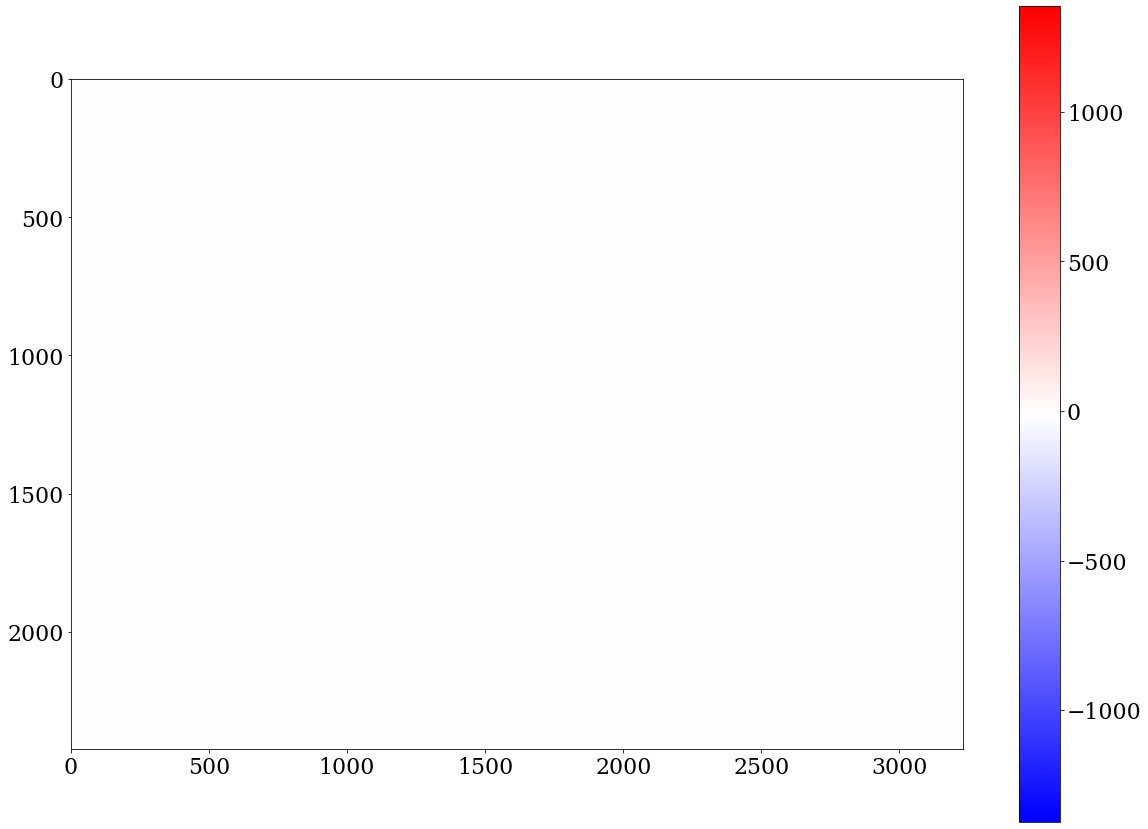

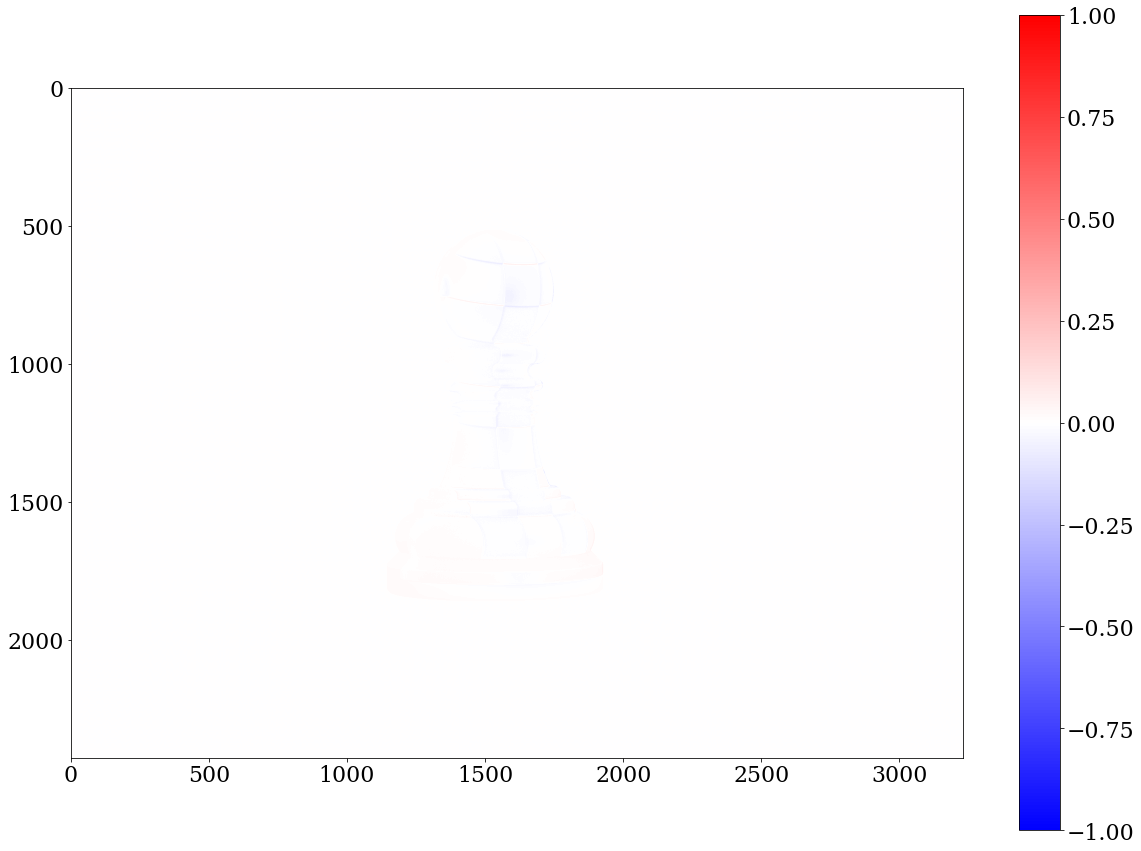

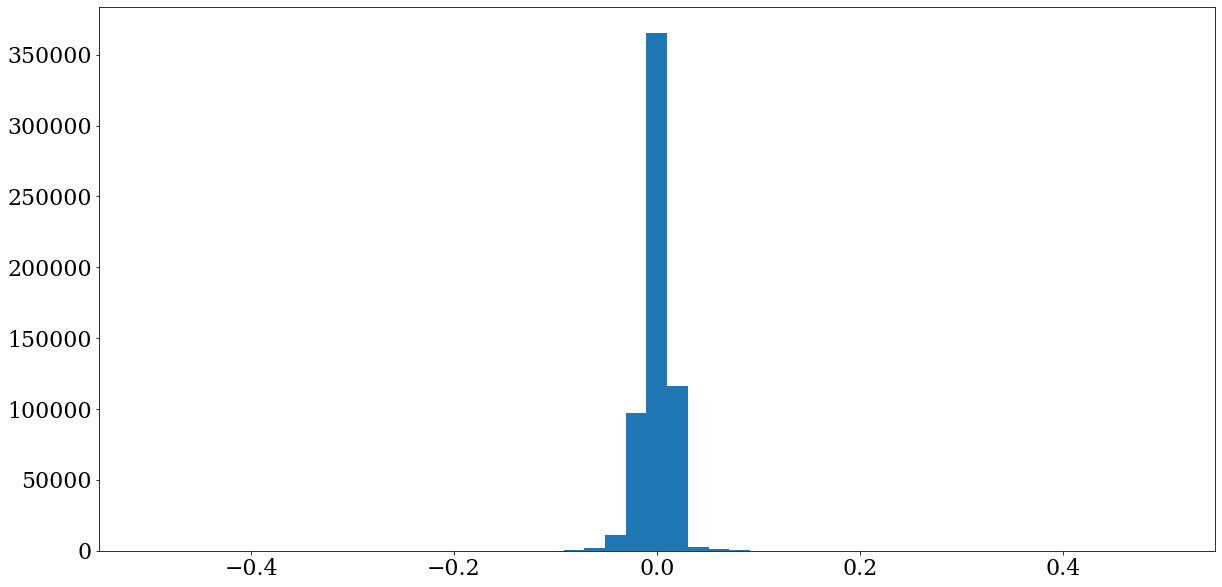

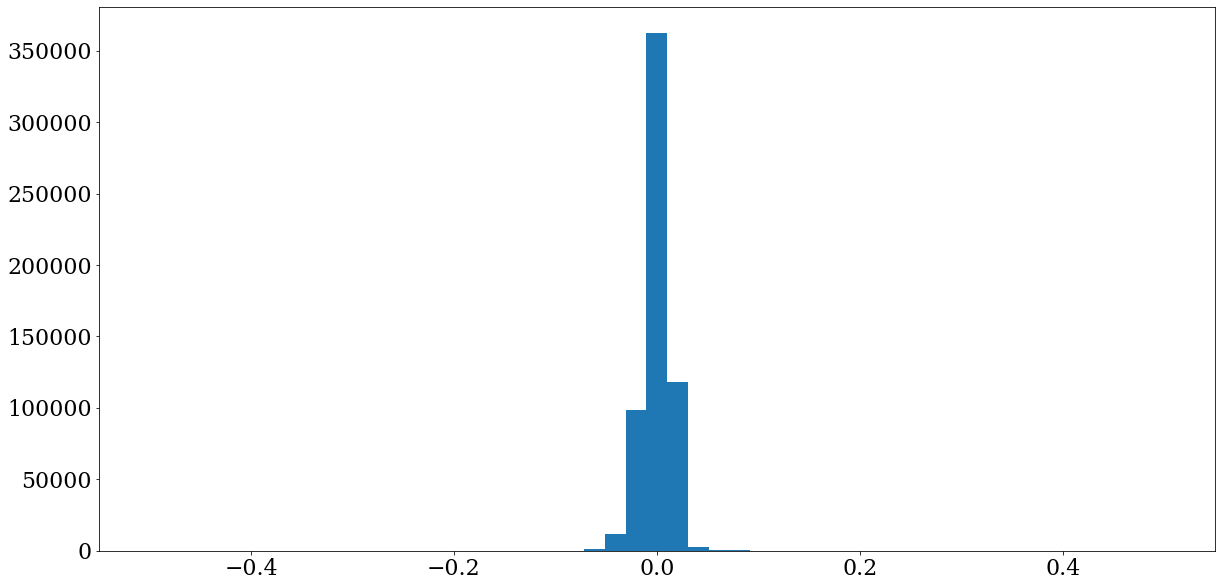

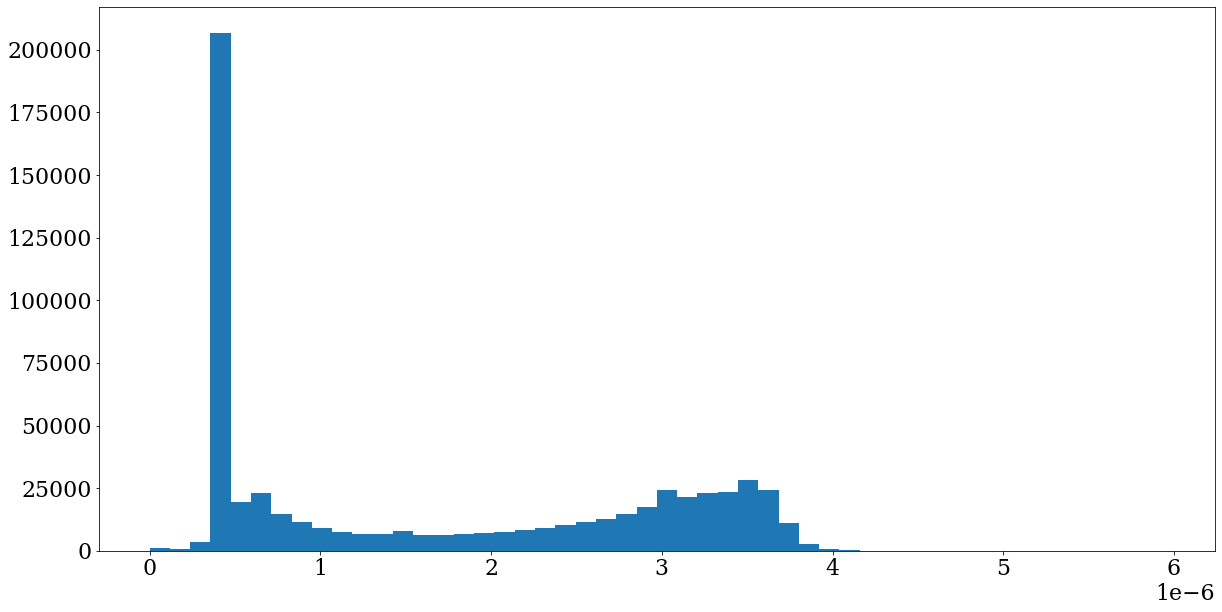

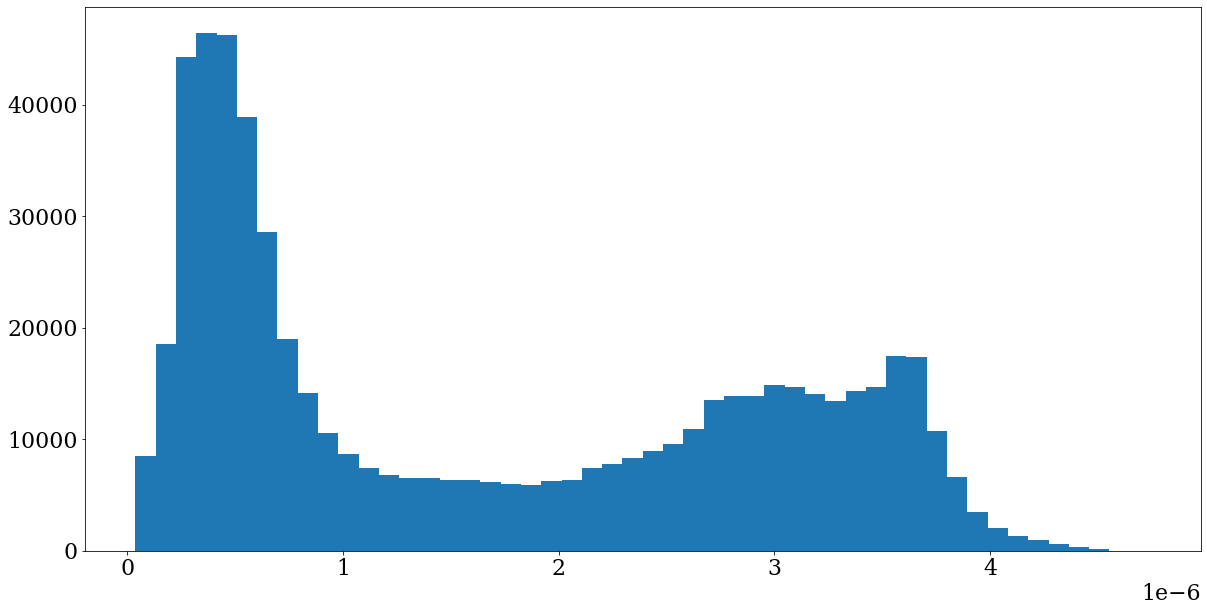

In [244]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

fig = plt.figure(figsize = (20,15))
pl = plt.imshow(diff2-0.5, cmap="bwr", vmin=-1373, vmax=1352)

fig.colorbar(pl)
plt.show()


fig = plt.figure(figsize = (20,15))
pl = plt.imshow(diff2-0.5, cmap="bwr", vmin=-1.0, vmax=1.0)
fig.colorbar(pl)
plt.show()
sim = load_image("data/results/pixel/pawn_match/org/0017_img_00.png", shift=False)
sca = load_image("data/results/pixel/pawn_match/org/pawn_checker.png", shift=False)
sim = normalize_image(sim)
sca = normalize_image(sca)

ddd = sim - sca

#print(np.min(sim), np.max(sim), np.mean(sim), np.min(sca), np.max(sca), np.mean(sca))
mmax = max(np.max(sim), np.max(sca))
diffi = sim/mmax - sca/mmax
dist = np.max(diffi) - np.min(diffi)
diffi = 0.5/dist * diffi + 0.5


plt.figure(figsize = (20,10))
plt.hist(diff2[img_mask==1].reshape(-1)-0.5, bins=np.linspace(-0.5, 0.5, 50))
plt.show()

plt.figure(figsize = (20,10))
plt.hist(diffi[img_mask==1].reshape(-1)-0.5, bins=np.linspace(-0.5, 0.5, 50))
plt.show()
plt.figure(figsize = (20,10))
plt.hist(sim[img_mask==1].reshape(-1), bins=50)
plt.show()
plt.figure(figsize = (20,10))
plt.hist(sca[img_mask==1].reshape(-1), bins=50)
plt.show()
#cv2.imwrite("data/results/pixel/pawn_scan.png", (1-sca)*255)
#cv2.imwrite("data/results/pixel/pawn_sim.png", (1-sim)*255)


In [237]:
import numpy as np
import matplotlib.pyplot as plt
with open("data/results/matching/shapes_match_scan/decoded/group_cam_xy.npy", "rb") as fi:
    dec = np.load(fi)

print(dec.shape)

(554196, 2)


In [ ]:
import os
from rendering import render_object
import cv2
import matplotlib.pyplot as plt
import matplotlib

os.chdir("/home/sebastian/Projects/SRB/Package/scanner-sim")


# Parameter optimization
pars = generate_render_parameters("objects/machined/pawn.obj", "results/pixel/pawn_match/", typ="pawn", cpu_count=8,
                                  samples=32, patterns="patterns/white")
config_name = "data/configs/parameters_pawn_match.json"

# with open(config_name, "w") as fi:
#     json.dump(pars, fi, indent=2, sort_keys=True)   
# render_object(config_name)



def load_image(path, width=pars["cam_width"], height=pars["cam_height"], shift=True):
    img = cv2.imread(path, 0).astype("float64") / 255
    if shift: # Account for optical axis shift
        img = cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_CUBIC)
        img = np.concatenate([np.zeros((2, width)), img], axis=0)
        img = np.concatenate([img, np.zeros((height+2, 2))], axis=1)
        img = img[:-2, 4:]
    return img

def normalize_image(img, typ="PD"):
    if typ == "PD": #probability density
        return img / np.sum(img)
    
def plot_image(img, typ="IH", mask=img_mask, scale=[0.0, 1.0, 50]):
    if "I" in typ:
        plt.figure(figsize = (10,10))
        plt.imshow(img, cmap="gray")
        plt.show()
    
    if "H" in typ:
        plt.figure(figsize = (10,10))
        plt.hist(img[mask==1].reshape(-1), np.linspace(scale[0], scale[1], scale[2]))
        plt.show()

img_white = load_image("data/results/pixel/pawn_normalized/white/white.png")

img_mask = load_image("data/results/pixel/pawn_mask.png", shift=False)
img_mask = (img_mask > 0.1)*1

img_white[img_mask==0] = 0.0

#img_render = load_image("data/results/pixel/pawn_match/img_000.png", shift=False)
#cv2.imwrite("data/results/pixel/pawn_org.png", img_white*255)

img_white = normalize_image(img_white)
#img_render = normalize_image(img_render)
# ma = max(np.max(img_white), np.max(img_render))
# plot_image(img_white, scale=[0.0, ma, 50])
# plot_image(img_render, scale=[0.0, ma, 50])
# diff = img_white-img_render
# plot_image(diff)

varis = ["const_radiance"]
#"mat_alpha", "mat_ior", "mat_diff", 
imgs_ref = [img_white]

cnt = 0

with open("data/results/pixel/configs/tmp_%03i.json"%cnt, "w") as fi:
    json.dump(pars, fi, indent=2, sort_keys=True)   
render_object("data/results/pixel/configs/%04i.json"%i)

mse_b = []
for im in range(len(imgs_ref)):
    img_c = load_image("data/results/pixel/pawn_match/img_%03i.png"%im, shift=False)
    #img_c[img_msk<200] = 0.0
    img_c = normalize_image(img_c)
    img_r = imgs_ref[im]

    mmax = max(np.max(img_c), np.max(img_r))
    #img_c /= mmax
    #img_r /= mmax
    #print(np.min(img_c/mmax), np.min(img_r/mmax), np.max(img_c/mmax), np.max(img_r/mmax))
    mse = np.sum((img_c - img_r)**2)
    mse2 = np.sum((img_c/mmax - img_r/mmax)**2)
    diff = img_c - img_r
    diff2 = img_c/mmax - img_r/mmax
    #print("Diff:", np.min(diff), np.max(diff), np.mean(diff), np.std(diff))
    #print("Diff2:", np.min(diff2), np.max(diff2), np.mean(diff2), np.std(diff2))
#         absi = np.abs(img_c/mmax - img_r/mmax)
#         plt.figure(figsize = (15,5))
#         plt.hist(absi[absi>0.0].reshape(-1), np.linspace(0, 0.30, 100))
#         plt.show()
    dist = np.max(diff2) - np.min(diff2)
    diff2 = 0.5/dist * diff2 + 0.5
    matplotlib.image.imsave('data/results/pixel/diffs/%04i_diff_c_%02i.png'%(i, im), diff2, vmin=0.0, vmax=1.0, cmap="bwr")
    matplotlib.image.imsave('data/results/pixel/diffs/%04i_diff_abs_%02i.png'%(i, im), np.abs(img_c - img_r), cmap="gray")
    #print("Difference before")
    #plt.imshow((img_c - img_r)**2)
    #plt.show()


# Load images
si = img_mask.shape[0] * img_mask.shape[1]
delta = 1e-3
gradients = []
vals = []
mses = []
pars_g = []

# for i in range(20):
    
#     with open("data/results/pixel/configs/%04i.json"%i, "w") as fi:
#         json.dump(pars, fi, indent=2, sort_keys=True)   
#     render_object("data/results/pixel/configs/%04i.json"%i)
    
#     mse_b = []
#     for im in range(len(imgs_ref)):
#         img_c = load_image("data/results/pixel/pawn_match/img_%03i.png"%im, shift=False)
#         #img_c[img_msk<200] = 0.0
#         img_c = normalize_image(img_c)
#         img_r = imgs_ref[im]
        
#         mmax = max(np.max(img_c), np.max(img_r))
#         #img_c /= mmax
#         #img_r /= mmax
#         #print(np.min(img_c/mmax), np.min(img_r/mmax), np.max(img_c/mmax), np.max(img_r/mmax))
#         mse = np.sum((img_c - img_r)**2)
#         mse2 = np.sum((img_c/mmax - img_r/mmax)**2)
#         diff = img_c - img_r
#         diff2 = img_c/mmax - img_r/mmax
#         #print("Diff:", np.min(diff), np.max(diff), np.mean(diff), np.std(diff))
#         #print("Diff2:", np.min(diff2), np.max(diff2), np.mean(diff2), np.std(diff2))
# #         absi = np.abs(img_c/mmax - img_r/mmax)
# #         plt.figure(figsize = (15,5))
# #         plt.hist(absi[absi>0.0].reshape(-1), np.linspace(0, 0.30, 100))
# #         plt.show()
#         dist = np.max(diff2) - np.min(diff2)
#         diff2 = 0.5/dist * diff2 + 0.5
#         matplotlib.image.imsave('data/results/pixel/diffs/%04i_diff_c_%02i.png'%(i, im), diff2, vmin=0.0, vmax=1.0, cmap="bwr")
#         matplotlib.image.imsave('data/results/pixel/diffs/%04i_diff_abs_%02i.png'%(i, im), np.abs(img_c - img_r), cmap="gray")
#         #print("Difference before")
#         #plt.imshow((img_c - img_r)**2)
#         #plt.show()
#         mse_b.append(mse)
        
#         os.rename("data/results/pixel/pawn_match/img_%03i.png"%im, "data/results/pixel/pawn_match/%04i_img_%02i.png"%(i,im))

#     print("%04i MSE before:"%i, mse_b)

#     grad = {}
#     for v in varis:
#         pars_n = pars.copy()
#         pars_n[v] -= delta#max(0.01, 0.05 * pars_n[v])
        
#         with open("data/results/pixel/configs/%04i_tmp.json"%i, "w") as fi:
#             json.dump(pars_n, fi, indent=2, sort_keys=True)   
#         render_object("data/results/pixel/configs/%04i_tmp.json"%i)
        
#         mse_m = []
#         for im in range(len(imgs_ref)):
#             img_c = load_image("data/results/pixel/pawn_match/img_%03i.png"%im, shift=False)
#             #img_c[img_msk<200] = 0.0
#             img_c = normalize_image(img_c)
#             img_r = imgs_ref[im]
#             mse = np.sum((img_c - img_r)**2)
#             mse_m.append(mse)

#         #print(mse_b, mse_m)
#         grad[v] = (sum(mse_b) - sum(mse_m))/delta

#     gradients.append(grad)
#     #print("Pars with grad")

#     step = 100.0 #1.0
#     for j in range(20):
#         pars_n = pars.copy()
#         length = 0.0
#         for v in varis:
#             pars_n[v] = pars_n[v] - step * grad[v]
#             length += grad[v]**2
#             print(v, pars[v], pars_n[v])
            
        
#         with open("data/results/pixel/configs/%04i_tmp_g.json"%i, "w") as fi:
#             json.dump(pars_n, fi, indent=2, sort_keys=True)   
#         render_object("data/results/pixel/configs/%04i_tmp_g.json"%i)
        
#         mse_g = []
#         for im in range(len(imgs_ref)):
#             img_c = load_image("data/results/pixel/pawn_match/img_%03i.png"%im, shift=False)
#             #img_c[img_msk<200] = 0.0
#             img_c = normalize_image(img_c)
#             img_r = imgs_ref[im]
#             mse = np.sum((img_c - img_r)**2)
#             mse_g.append(mse)
        
#         print("MSEs", mse_g, mse_b)
            
#         if sum(mse_g) < sum(mse_b):
#             print("Found step", step)
#             break
#         step /= 2.0
    
#     print("Gradient: ", grad, "Length:", np.sqrt(length))

        
#     vals.append(pars_n)
#     pars = pars_n
#     pars_g.append(pars_n)
#     mses.append(mse_g)
#     print("%0MSEs: ", mse_g, "Total: ", sum(mse_g))
# #     for im in range(len(imgs)):
# #         img_c = images[im]
# #         #img_c[img_msk<200] = 0.0
# #         img_c /= np.sum(img_c)
# #         img_r = imgs_ref[im]
# #         plt.figure(figsize = (20,10))
# #         plt.imshow((img_c - img_r)**2, cmap="gray")
# #         plt.show()
        
#     plt.figure(figsize = (20,10))
#     for v in varis:
#         pt = []
#         for g in gradients:
#             pt.append(g[v])
#         plt.plot(pt, label=v)
#     plt.legend(loc="upper left")
#     plt.show()

#     plt.figure(figsize = (20,10))
#     for v in varis:
#         pt = []
#         for g in vals:
#             pt.append(g[v])
#         plt.plot(pt, label=v)
#     plt.legend(loc="upper left")
#     plt.show()

#     plt.figure(figsize = (20,10))
#     for i in range(len(mses[0])):
#         pt = []
#         for g in mses:
#             pt.append(g[i])
#         plt.plot(pt, label="MSE_%i"%i)
#     plt.legend(loc="upper left")
#     plt.show()

# # with open(config_name, "w") as fi:
# #     json.dump(pars, fi, indent=2, sort_keys=True)   
# # render_object(config_name)

In [1]:
# Write render configuration
import numpy as np
import json
import os

def generate_render_parameters(obj_path, result_path, typ="calib", size="medium", cpu_count=12, samples=32, patterns="patterns/gray/predistorted"): 
    #typ shapes, pawn, lplan, plane, calib, center, rook
    #size medium, small, large

    cam_w = 6464
    cam_h = 4852

    if size == "large":
        cam_w = 6464
        cam_h = 4852
    if size == "medium":
        cam_w = int(cam_w/2)
        cam_h = int(cam_h/2)
    if size == "small":
        cam_w = int(cam_w/4)
        cam_h = int(cam_h/4)

    cam_wa = int(cam_h * 1.3331977988173698) # Account for pixel aspect ratio
    
    # Projector rotation and translation
    r = np.array([[0.8787054478263335,  -0.01630932436494734,  0.47708567563812],
                 [0.012209582502145412, 0.9998570945107125, 0.011692589607071084],
                 [-0.47720819571277884, -0.004449325269635517, 0.8787790060357604]])

    t = np.array([[0.2256677886438659, 0.07394777683137411, 0.4140179434986635, 1.0]])
    r = np.vstack([r.T, np.zeros(3)])
    trans_pro = np.hstack([r, t.T]).reshape(-1)

    pars = {
      # Object Rotation parameters
      "rot_x": 0,
      "rot_y": 0,
      "rot_z": 0,
      "rot_range": [[-45, 45], [-45, 45], [-45, 45], 30],
      "rot_type": "Fixed", #"Turntable", #"Fixed", "Random"
      # Object Translation parameters
      "trans_x": 0.0,
      "trans_y": 0.0,
      "trans_z": 0.0,
      "trans_range": [[-0.1, 0.1], [-0.1, 0.1], [-0.1, 0.1], 5],
      "trans_type": "Fixed",
      # Camera parameters
      "cam_aperture": 0.00016,
      "cam_focus": 0.81,
      "cam_fovy": 18.728257607815436,
      "cam_tx": 0.0,
      "cam_ty": 0.0,
      "cam_tz": 1.0,
      "cam_ux": 0.0,
      "cam_uy": -1.0,
      "cam_uz": 0.0,
      "cam_x": 0.0,
      "cam_y": 0.0,
      "cam_z": 0.0,
      "cam_height": cam_h,
      "cam_width": cam_wa,
      "cam_crop_offset_x": int((cam_wa-cam_w)/2),
      "cam_crop_offset_y": 0,
      "cam_crop_width": cam_w,
      "cam_crop_height": cam_h,
      # Global parameters
      "cpu_count": cpu_count,
      "samples": samples,
      "result_path": result_path,
      "result_overwrite": True,
      "scene_path": "scenes/scene_sls.xml",
      "root_path": "data",
      "render_ambient": True,
      # Pattern parameters
      "pattern_path": patterns,#mps/64-05", gray/default
      "pattern_numbered": True, # If patterns have numbered names
      "pattern_colored": False, # Colored patterns/rendering
      "pattern_calibrate": True, # Calibrate/predistort patterns
      "pattern_overwrite": True, # Overwrite possible existing patterns
      "pattern_quadrify": True, # Pad patterns for quadratic spotlight
      "pattern_pad_below": True,
      "pattern_flip_ud": True,
      "pattern_width": 1920,
      "pattern_height": 1080,
      # Object parameters
      "shape_type": obj_path[-3:], # ply/obj
      "object_path": obj_path,
      "scale": 0.001, # 0.001 for calib objects
      "obj_rx": 0.0,
      "obj_ry": 0.0,
      "obj_rz": 0.0,
      "obj_ttx": 0.0,
      "obj_tty": 0.0,
      "obj_ttz": 0.0,
      "obj_x": 0.0,
      "obj_y": 0.0,
      "obj_z": 0.0,
      "obj_trans": None,#trans.tolist(),
      # Projector parameters
      "pro_aperture": 0.0002835,
      "pro_beamwidth": 21.33245815404095,
      "pro_cutoff": 21.33245815404095,
      "pro_focus": 0.49,
      "pro_intensity": 0.5,
      "pro_offset_x": 0.5+0.00045641259698767686,
      "pro_offset_y": -0.007074395253308992,
      "pro_scale_x": 0.5,
      "pro_scale_y": 0.5,
      "pro_tx": 0.0,
      "pro_ty": 0.0,
      "pro_tz": 0.0,
      "pro_ux": 0.0,
      "pro_uy": 0.0,
      "pro_uz": 0.0,
      "pro_x": 0.0,
      "pro_y": 0.0,
      "pro_z": 0.0,
      "pro_ox": 0.0,
      "pro_oy": 0.0,
      "pro_oz": 0.0,
      "proj_trans": trans_pro.tolist(),
      # Lighting/Material parameters
      "const_radiance": 0.01,
      "mat_ior": 1.0634878252015734,
      "mat_alpha": 0.22150848706292028,
      "mat_diff": 0.9112623909906508
    }
    
    if typ == "pawn":
        r = np.array([[9.99985088e-01, -5.46014155e-03, -1.06692981e-04],
                      [0.00000000e+00, -1.95366030e-02,  9.99809142e-01],
                      [-5.46118386e-03, -9.99794233e-01, -1.95363117e-02]])
        t = np.array([[-.00948753506, .07090617493, 0.86120278452, 1.0]])
        
    if typ == "shapes":
        r = np.array([[0.00473251, 0.99973483, 0.02252548],
                     [0.70316257, -0.0193432,   0.71076595],
                     [0.71150094,  0.01246195, -0.70257463]])
        t = np.array([[-.07613365619, -0.10450656288, 0.81651577885, 1.0]])
        pars["scene_path"] = "scenes/scene_sls_tex.xml"
    
    if typ == "center":
        r = np.array([[1.0, 0.0, 0.0],
                      [0.0, -1.0, 0.0],
                      [0, 0.0, -1.0]])
        t = np.array([[0.0, -0.02, 0.858, 1.0]])
        
    if typ == "rook":
        t = np.array([[-.00965021966, .07090294057, 0.86141378352, 1.0]])
        r = np.array([[ 9.99985088e-01, -5.46014155e-03, -1.06692981e-04],
                     [ 0.00000000e+00, -1.95366030e-02,  9.99809142e-01],
                     [-5.46118386e-03, -9.99794233e-01, -1.95363117e-02]])

    if typ == "plane":
        t = np.array([[ -.0083332819, -.00283606196, 0.83846561563, 1.0]]) 
        r = np.array([[0.90031236, -0.01464571,  0.43499787],
                      [0.01133496, 0.99988369, 0.01020466],
                      [-0.43509673, -0.0042567, 0.90037365]])

    if typ == "lplane":
        t = np.array([[-.00795539039, -.02476862133, 0.84448289208, 1.0]])
        r = np.array([[0.72965066, -0.46024329,  0.50575293],
                      [0.38697703, -0.88768783, 0.24951773],
                      [0.56378958, 0.01365399, -0.82580559]])   
        pars["scale"] = 0.1
        
    if typ == "vase":
        trans = np.array([[ 5.98357629e+01, 1.73780698e+00, -5.15957625e+01, -1.13917137e+01],
                         [-2.11396908e-01, -7.89745329e+01, -2.90511434e+00,  3.18578817e+01],
                         [-5.16245870e+01,  2.33760665e+00, -5.97904575e+01,  8.60359595e+02],
                         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
        trans[:3, :] = trans[:3, :] / 100
        trans[:3, 3] = trans[:3, 3] / 10
        trans = trans.reshape(-1)
        pars["scene_path"] = "scenes/scene_sls_tex.xml"
#         pars["pro_intensity"] = 20.0
#         pars["const_radiance"] = 0.1
 
    if typ == "sculpture":
        trans = np.array([[5.93805928e+01, -7.04532055e-01, -4.45788431e+01, -1.34888086e+01],
                         [2.85445598e-01, -7.42383296e+01,  1.55349953e+00,  7.14825672e+01],
                         [-4.45834963e+01, -1.41367413e+00, -5.93644490e+01,  8.52635829e+02],
                         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
        trans[:3, :] = trans[:3, :] / 100
        trans[:3, 3] = trans[:3, 3] / 10
        trans = trans.reshape(-1)
        pars["scene_path"] = "scenes/scene_sls_tex.xml"
        
    if type == "dodo":
        trans = np.array([[2.40875072e+00, -4.40313574e-02, -1.03494969e+01, -7.01796345e+00],
                 [ 2.11953027e-01, -1.06236644e+01,  9.45279153e-02,  5.98905411e+01],
                 [-1.03474200e+01, -2.27861475e-01, -2.40729791e+00,  8.61709585e+02],
                 [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
                         
        trans[:3, :] = trans[:3, :] / 100
        trans[:3, 3] = trans[:3, 3] / 10
        trans = trans.reshape(-1)
        pars["scene_path"] = "scenes/scene_sls_tex.xml"
                         
    if typ == "vessel":
        trans = np.array([[-441.30169547,  123.25346392, -295.41965328,  -10.90231931],
                         [-131.66575803, -528.49641954  ,-23.81253936  , 31.26875861],
                         [-291.767572,     52.07199344,  457.57137778,  861.65219967],
                         [   0.,            0.  ,          0.  ,          1.        ]])
                         
        trans[:3, :] = trans[:3, :] / 100
        trans[:3, 3] = trans[:3, 3] / 10
        trans = trans.reshape(-1)
        pars["scene_path"] = "scenes/scene_sls_tex.xml"

        
        
    if typ == "calib":
        pars['scene_path'] = "scenes/scene_sls_cal.xml"
        pars['object_path'] = "objects/calibration/cb10_8_3_ms_c.ply" 
        pars["rot_range"] = [[-15, 15], [-15, 15], [-15, 15], 1]
        pars["rot_type"] = "Random" #"Turntable", #"Fixed", "Random"
        pars["trans_range"] = [[-0.02, 0.02], [-0.01, 0.01], [-0.03, 0.1], 1]
        pars["trans_type"] = "Random"
        pars["render_ambient"] = False
        pars["const_radiance"] = 0.05
        pars["pro_intensity"] = 0.5
        pars["samples"] = 32
        r = np.array([[1, 0, 0.0], [0, 1, 0.0], [0, 0, 1.0]])
        t = np.array([[0.0, -0.02, 0.91, 1.0]])

    if typ != "vase":
        r = np.vstack([r.T, np.zeros(3)])
        trans = np.hstack([r, t.T]).reshape(-1)
        
    pars["obj_trans"] = trans.tolist()
    

    return pars

In [2]:
import numpy as np
trans = np.array([[ 5.98357629e+01, 1.73780698e+00, -5.15957625e+01, -1.13917137e+01],
                 [-2.11396908e-01, -7.89745329e+01, -2.90511434e+00,  3.18578817e+01],
                 [-5.16245870e+01,  2.33760665e+00, -5.97904575e+01,  8.60359595e+02],
                 [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

#trans /= 100
#r = trans[:3, :3]

#np.matmul(r, r.T)

print(np.linalg.inv(trans))

[[ 9.58067963e-03 -3.38480852e-05 -8.26593672e-03  7.22189666e+00]
 [ 2.78251184e-04 -1.26451082e-02  3.74288876e-04  8.39930929e-02]
 [-8.26132142e-03 -4.65156093e-04 -9.57342550e-03  8.15729676e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
